In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# input two datasets
rent = pd.read_csv("C:/Users/Lenovo/Documents/Fang88/Projects/fang88_rent.csv")
home_property = pd.read_csv("C:/Users/Lenovo/Documents/Fang88/Projects/fang88_property.csv", header=None, low_memory=False)

In [6]:
rent.shape

(1140607, 7)

In [7]:
home_property.shape

(381685, 59)

In [9]:
rent.head()

,__v,_id,address_zipcode,link_homedetails,rentzestimate_amount,unique_id,zestimate_amount
0,NaN,58eb5107c6c98c84347fa7a5,94010,http://www.zillow.com/homedetails/525-El-Cerri...,16619.0,MLSListings_81646083,5928873.0
1,NaN,58eb5107c6c98c84347fa7a6,95120,http://www.zillow.com/homedetails/7240-Wild-Cr...,3495.0,MLSListings_81646075,883847.0
2,NaN,58eb5c08c6c98c84347fa8d9,98391,http://www.zillow.com/homedetails/21026-30th-S...,4448.0,569e6d75055611.96147919,888309.0
3,NaN,58eb5c08c6c98c84347fa8da,98262,http://www.zillow.com/homedetails/2549-Taft-Dr...,1430.0,569e6d869514d7.19769412,256005.0
4,NaN,58eb5c08c6c98c84347fa8db,98230,http://www.zillow.com/homedetails/7405-Jackson...,1400.0,569e6d858057f3.84823418,257533.0


In [11]:
pd.options.display.max_columns=60
home_property.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,2201644,奥斯汀城市圈,104 S Elm ST,NaN,NaN,2.0,2.0,NaN,Flatonia,NaN,163000.0,0,"An early 1900's home with desired dog trot, sl...",1400.0,0.217489,NaN,NaN,29.687252,-97.098678,0.0,NaN,0.0,RESI,2318.0,70.0,ABOR,TX,A,NaN,ABOR_15645711,0,2017-01-05 17:46:02,NaN,1996.0,78941,0,2014-07-19 05:00:00,NaN,Tanya Schindler,9797431737,NaN,South Central Real Estate,NaN,938.0,0.0,1911730,RESI,Property,2662.0,"[{""path"":""9a7003a314f44f9288e66cc2cc32d286.jpg...",15645711,2014-07-22 16:24:50,0.0,NaN,NaN,9.0,NaN,NaN,NaN
1,2201645,奥斯汀城市圈,1408 Oak Hurst Rd,NaN,NaN,1.0,1.0,NaN,Austin,NaN,225000.0,0,Property features Three adjoining lots for sa...,1350.0,0.140412,NaN,NaN,30.388230,-97.965567,0.0,NaN,0.0,RESI,704.0,320.0,ABOR,TX,A,NaN,ABOR_15646314,0,2017-05-19 13:45:27,NaN,1955.0,78734,0,2015-07-24 05:00:00,NaN,Diana R. Taber,5126578367,NaN,Citygirls Residential Realty,NaN,664.0,0.0,2978258,RESI,Property,1887.0,"[{""path"":""3be302ba6b0041b9ad81395baaff15ad.jpg...",15646314,2015-07-24 22:42:54,0.0,NaN,NaN,10.0,NaN,NaN,NaN
2,2201655,奥斯汀城市圈,811 Congress Ave,NaN,NaN,8.0,5.0,NaN,Austin,NaN,5200000.0,0,Unique historically designated property situat...,24799.0,0.069762,NaN,NaN,30.270244,-97.741539,0.0,NaN,0.0,NaN,8808.0,590.0,ABOR,TX,A,NaN,ABOR_16160231,0,2017-04-04 23:03:05,http://www.811congress.com/,1930.0,78701,0,2014-10-18 05:00:00,NaN,Tammy Koen,5129173439,NaN,Gottesman Residential R.E.,NaN,899.0,0.0,1350203,RESI,Property,77013.0,"[{""path"":""e51c98c50ad5619b4eed134450e6c106.jpg...",16160231,2015-09-01 15:21:34,3.0,NaN,NaN,10.0,NaN,NaN,NaN
3,2201659,NaN,136 Bradley ST,NaN,NaN,2.0,3.0,NaN,Other,NaN,27500.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1585.0,17.0,ABOR,MS,A,NaN,ABOR_16429731,0,2017-01-02 17:54:13,NaN,1955.0,39209,0,2014-12-05 06:00:00,NaN,David Buttross,5123546877,NaN,Buttross Properties,NaN,204.0,0.0,9239102,RESI,Property,0.0,"[{""path"":""0dfbcc443097abd1e70357c93e4bec9b.jpg""}]",16429731,2014-12-19 00:21:36,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2201661,奥斯汀城市圈,17700 Edgewood Way # 201,NaN,NaN,3.0,3.0,NaN,Jonestown,NaN,259900.0,0,Beautiful Lake Travis view from this large 3/3...,1950.0,0.136756,NaN,NaN,30.454888,-97.934025,0.0,NaN,0.0,APT,1715.0,152.0,ABOR,TX,A,NaN,ABOR_16486713,0,2017-04-19 15:51:00,http://tours.twisttours.com/120299,2006.0,78645,0,2015-01-05 06:00:00,NaN,Mary L Lyons,5126193841,NaN,Keller Williams - Lake Travis,NaN,835.0,NaN,9617218,RESI,Property,7152.0,"[{""path"":""cccd298cbbb889b3772b545f2f0ef25a.jpg...",16486713,2015-06-01 18:03:04,0.0,NaN,NaN,10.0,NaN,NaN,NaN


In [4]:
# check data
# Columns with too many nulls 3, 4, 7, 15, 20, 28, 40, 42, 53, 54, 56, 57, 58
home_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381685 entries, 0 to 381684
Data columns (total 59 columns):
0     381685 non-null int64
1     243087 non-null object
2     380519 non-null object
3     21106 non-null object
4     3035 non-null object
5     362446 non-null float64
6     350844 non-null float64
7     12806 non-null object
8     381168 non-null object
9     201794 non-null object
10    381684 non-null float64
11    381685 non-null int64
12    372326 non-null object
13    277477 non-null float64
14    233069 non-null float64
15    3035 non-null object
16    252117 non-null float64
17    359871 non-null float64
18    359871 non-null float64
19    240094 non-null float64
20    5589 non-null object
21    104334 non-null float64
22    372928 non-null object
23    338765 non-null float64
24    324925 non-null float64
25    381685 non-null object
26    381001 non-null object
27    381685 non-null object
28    37862 non-null float64
29    381685 non-null object
30    381685 non-

In [5]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140607 entries, 0 to 1140606
Data columns (total 7 columns):
__v                     608785 non-null float64
_id                     1140607 non-null object
address_zipcode         880152 non-null object
link_homedetails        1140607 non-null object
rentzestimate_amount    1052848 non-null float64
unique_id               1140607 non-null object
zestimate_amount        1109718 non-null float64
dtypes: float64(3), object(4)
memory usage: 60.9+ MB


In [12]:
# selected useful columns as new dataset
new_property = home_property.iloc[:,[5,6,8,10,17,18,19,22,23,26,29,33,34]]
new_property.columns = ["bathrooms", "bedrooms", "city", "current_list_price", "location_latitude", "location_longitude", \
                        "lot_sqft", "property_type", "sqft", "state", "unique_id","year_built", "zip"]

In [139]:
# extract id from rent
#id_split = rent['unique_id'].str.replace('.', '_')
#id_split = pd.DataFrame(id_split.str.split('_').tolist(), columns = ['number', 'unique_id'])

In [140]:
# combine id and rentestimate
# zestimate_rent_id = pd.concat([id_split['unique_id'], rent['rentzestimate_amount'] ], axis = 1)
# zestimate_rent_id.columns

In [149]:
# zestimate_rent_id[zestimate_rent_id.duplicated(['unique_id'], keep = False)].sort(['unique_id'])

,unique_id,rentzestimate_amount
4118,08713339,2200.0
515989,08713339,1500.0
263357,09290202,1775.0
915103,09290202,1750.0
91961,09309831,975.0
660409,09309831,2000.0
132716,09336315,3425.0
58711,09336315,NaN
6692,09396193,2148.0
115119,09396193,11025.0


In [13]:
new_rent = rent[["unique_id", "rentzestimate_amount"]]

In [14]:
new_rent.head()

,unique_id,rentzestimate_amount
0,MLSListings_81646083,16619.0
1,MLSListings_81646075,3495.0
2,569e6d75055611.96147919,4448.0
3,569e6d869514d7.19769412,1430.0
4,569e6d858057f3.84823418,1400.0


In [15]:
# merge two datasets by unique_id
data = pd.merge(new_property, new_rent,  on='unique_id', how='left')

In [16]:
data.shape

(381685, 14)

In [17]:
data.head()

,bathrooms,bedrooms,city,current_list_price,location_latitude,location_longitude,lot_sqft,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount
0,2.0,2.0,Flatonia,163000.0,29.687252,-97.098678,0.0,RESI,2318.0,TX,ABOR_15645711,1996.0,78941,1400.0
1,1.0,1.0,Austin,225000.0,30.388230,-97.965567,0.0,RESI,704.0,TX,ABOR_15646314,1955.0,78734,1350.0
2,8.0,5.0,Austin,5200000.0,30.270244,-97.741539,0.0,NaN,8808.0,TX,ABOR_16160231,1930.0,78701,24799.0
3,2.0,3.0,Other,27500.0,NaN,NaN,NaN,NaN,1585.0,MS,ABOR_16429731,1955.0,39209,NaN
4,3.0,3.0,Jonestown,259900.0,30.454888,-97.934025,0.0,APT,1715.0,TX,ABOR_16486713,2006.0,78645,1950.0


In [18]:
# there are duplicates of ID in data
data[data.duplicated(['unique_id'], keep=False)]

,bathrooms,bedrooms,city,current_list_price,location_latitude,location_longitude,lot_sqft,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount


In [19]:
#new_data['rentzestimate_amount'].describe()
data['rentzestimate_amount'].isnull().sum()

103344

In [20]:
# extract data with rentzestimate null for future prediction use
data_null = data[data['rentzestimate_amount'].isnull()]

In [21]:
data_null.shape

(103344, 14)

In [22]:
data_null.head()

,bathrooms,bedrooms,city,current_list_price,location_latitude,location_longitude,lot_sqft,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount
3,2.0,3.0,Other,27500.0,NaN,NaN,NaN,NaN,1585.0,MS,ABOR_16429731,1955.0,39209,NaN
7,3.0,3.0,San Marcos,334900.0,29.866884,-97.968936,0.0,COND,2351.0,TX,ABOR_17615028,2016.0,78666,NaN
13,3.0,3.0,Leander,349990.0,30.527986,-97.900691,NaN,RESI,2148.0,TX,ABOR_18511226,2015.0,78641,NaN
17,3.0,3.0,Austin,431350.0,30.400907,-97.842613,NaN,APT,1825.0,TX,ABOR_18761706,2015.0,78726,NaN
19,1.0,3.0,Other,19500.0,NaN,NaN,NaN,RESI,840.0,IN,ABOR_18856295,1952.0,46406,NaN


In [23]:
data_estimate = data[-data['rentzestimate_amount'].isnull()]

In [20]:
data_estimate.head()

,bathrooms,bedrooms,city,current_list_price,location_latitude,location_longitude,lot_sqft,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount
0,2.0,2.0,Flatonia,163000.0,29.687252,-97.098678,0.0,RESI,2318.0,TX,ABOR_15645711,1996.0,78941,1400.0
1,1.0,1.0,Austin,225000.0,30.388230,-97.965567,0.0,RESI,704.0,TX,ABOR_15646314,1955.0,78734,1350.0
2,8.0,5.0,Austin,5200000.0,30.270244,-97.741539,0.0,NaN,8808.0,TX,ABOR_16160231,1930.0,78701,24799.0
4,3.0,3.0,Jonestown,259900.0,30.454888,-97.934025,0.0,APT,1715.0,TX,ABOR_16486713,2006.0,78645,1950.0
5,5.0,3.0,Burnet,6850000.0,30.674729,-98.212187,640.0,RESI,4889.0,TX,ABOR_16633908,2000.0,78611,9320.0


In [24]:
data_estimate = data_estimate.drop(["lot_sqft", "location_latitude", 'location_longitude'], 1)

In [25]:
data_train = data_estimate.sample(frac=0.7, random_state=10)
data_test = data_estimate.drop(data_train.index)

In [26]:
data_train.shape

(194839, 11)

In [27]:
data_test.shape

(83502, 11)

In [28]:
data_train.describe()

,bathrooms,bedrooms,current_list_price,sqft,year_built,rentzestimate_amount
count,190328.000000,187570.000000,1.948380e+05,182230.000000,1.868320e+05,194839.000000
mean,2.498597,3.356624,6.948948e+05,2327.189179,2.091947e+03,3486.484482
std,1.305535,1.286088,1.772303e+06,2157.128501,4.527661e+04,5516.585570
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,400.000000
25%,2.000000,3.000000,2.150000e+05,1319.000000,1.966000e+03,1555.000000
50%,2.000000,3.000000,3.749900e+05,1973.000000,1.988000e+03,2200.000000
75%,3.000000,4.000000,6.749000e+05,2944.000000,2.004000e+03,3297.000000
max,99.990000,99.900000,2.500000e+08,370029.000000,1.957194e+07,250000.000000


In [29]:
# missing data
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
sqft,12609,0.064715
year_built,8007,0.041095
bedrooms,7269,0.037308
property_type,4713,0.024189
bathrooms,4511,0.023152
zip,6,0.000031
state,2,0.000010
city,2,0.000010
current_list_price,1,0.000005
rentzestimate_amount,0,0.000000


In [30]:
data_train.corr()

,bathrooms,bedrooms,current_list_price,sqft,year_built,rentzestimate_amount
bathrooms,1.000000,0.651970,0.420376,0.550463,-0.000886,0.505067
bedrooms,0.651970,1.000000,0.245796,0.470597,0.004787,0.294716
current_list_price,0.420376,0.245796,1.000000,0.357682,0.000585,0.728501
sqft,0.550463,0.470597,0.357682,1.000000,-0.000420,0.402162
year_built,-0.000886,0.004787,0.000585,-0.000420,1.000000,-0.000572
rentzestimate_amount,0.505067,0.294716,0.728501,0.402162,-0.000572,1.000000


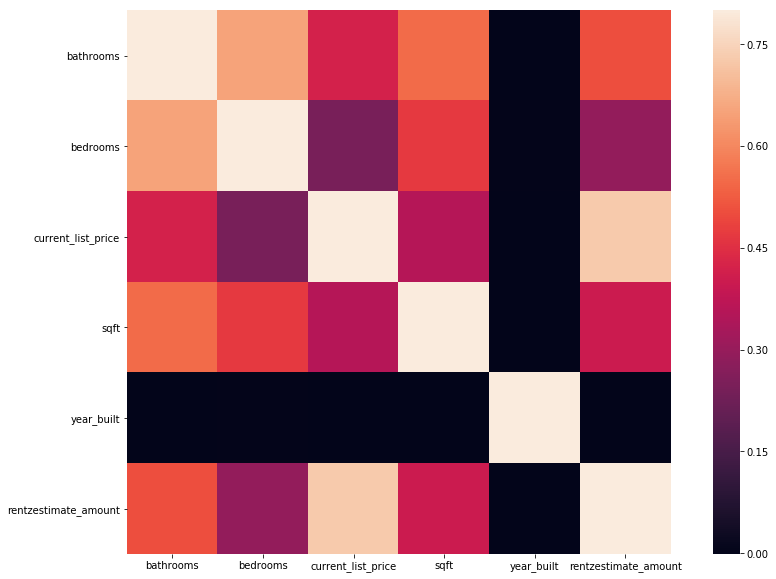

In [31]:
#correlation matrix
corrmat = data_train.corr()
plt.figure(figsize=(15,10))
#fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [20]:
print(data_train.skew())

bathrooms                 3.917196
bedrooms                  3.292104
current_list_price       37.031776
location_latitude         0.482155
location_longitude       -0.592192
sqft                     58.538551
year_built              432.211527
rentzestimate_amount     11.575512
dtype: float64


In [33]:
# look at each feature 
# histogram
# sns.distplot(data_train['rentzestimate_amount'])
# plt.hist(data_train['bathrooms'].dropna())
# numerical variables, rent, bathrooms, bedrooms, sqft, price, histogram
# categorical variables, city, state, property type, zip, boxplot

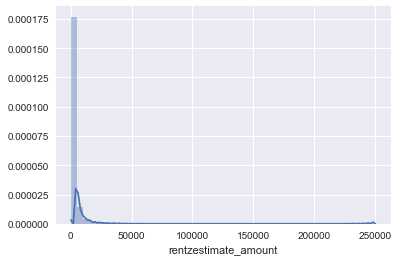

In [34]:
#using_data.rentzestimate_amout.hist(rwidth=0.8)
#dd = using_data['rentzestimate_amount']
sns.distplot(data_train['rentzestimate_amount'])
#skewness and kurtosis
#print("Skewness: %f" % using_data['rentzestimate_amount'].skew())
#print("Kurtosis: %f" % using_data['rentzestimate_amount'].kurt())

In [21]:
data_train['rentzestimate_amount']. describe()
# 75% quantile is 3297, the max is 250000, need to remove the extreme large values

count    194839.000000
mean       3486.484482
std        5516.585570
min         400.000000
25%        1555.000000
50%        2200.000000
75%        3297.000000
max      250000.000000
Name: rentzestimate_amount, dtype: float64

(array([  1.90039000e+05,   2.76000000e+02,   1.20000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0.   ,   9.999,  19.998,  29.997,  39.996,  49.995,  59.994,
         69.993,  79.992,  89.991,  99.99 ]),
 <a list of 10 Patch objects>)

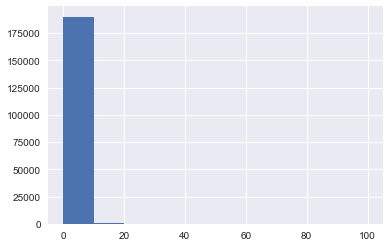

In [29]:
plt.hist(data_train['bathrooms'].dropna())
# some bathrooms are extreme

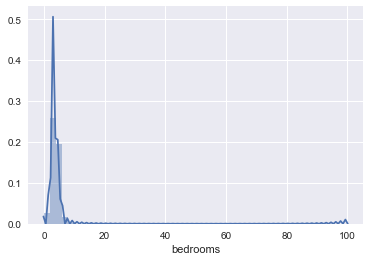

In [30]:
sns.distplot(data_train['bedrooms'].dropna())
# extreme values

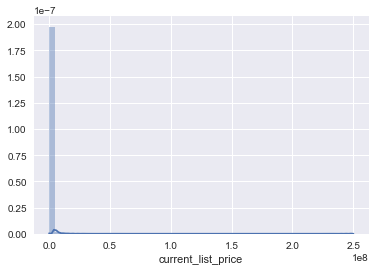

In [31]:
sns.distplot(data_train['current_list_price'].dropna())
# extreme values

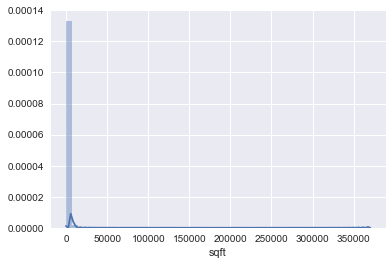

In [32]:
sns.distplot(data_train['sqft'].dropna())
# extreme values

In [38]:
data_train["city"].value_counts()
#data_train.property_type.unique()

Houston              5843
Miami                4040
Las Vegas            2794
Chicago              2542
Austin               1643
Orlando              1594
Los Angeles          1482
Miami Beach          1441
Tampa                1400
Dallas               1394
Sarasota             1391
Palm Desert          1213
Spring                959
Aventura              930
Jacksonville          917
Katy                  880
San Diego             868
Fort Worth            821
Boca Raton            821
La Quinta             797
St Petersburg         752
The Woodlands         711
Honolulu              704
Henderson             698
Palm Springs          696
Atlanta               689
Bradenton             687
Kissimmee             679
Hollywood             617
Sunny Isles Beach     616
                     ... 
Del Rey Oaks            1
Lakehead                1
Ballard                 1
Peshastin               1
Epworth                 1
Orosi                   1
Lingleville             1
Goffstown   

In [37]:
data_train["state"].value_counts()

FL    47748
CA    40613
TX    36727
IL    22995
GA    14737
MA     9509
WA     7456
NY     6701
NV     4769
HI     1614
NJ     1244
NH      149
RI      128
IN       80
AL       79
WI       68
NC       63
CT       60
SC       35
OK       12
MD       11
MI        6
OH        5
TN        4
IA        3
NE        3
ME        3
LA        2
OR        2
Hi        2
VA        2
CO        1
MO        1
AR        1
UT        1
WV        1
VT        1
KS        1
Name: state, dtype: int64

In [78]:
data_train["zip"].value_counts()

33160    993
92253    798
33139    759
92211    731
33180    712
33131    593
92270    579
33009    501
77494    489
33141    479
92260    478
33178    404
34747    389
33140    385
77007    356
92264    353
33132    348
77479    346
92234    334
92203    327
92262    320
60010    303
77382    299
33137    285
33154    285
33019    277
92201    277
77356    276
34746    270
33130    266
        ... 
02570      1
99167      1
95316      1
36207      1
61336      1
06016      1
60144      1
78622      1
74728      1
92275      1
30904      1
76501      1
76305      1
33901      1
99338      1
53014      1
98819      1
03033      1
01338      1
95630      1
61957      1
60460      1
08648      1
11768      1
94533      1
03849      1
93730      1
62629      1
53190      1
95358      1
Name: zip, Length: 5414, dtype: int64

In [ ]:
# relationship between rent and features

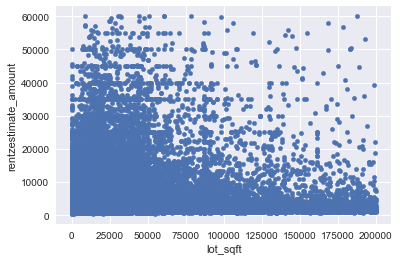

In [72]:
var = 'lot_sqft'
data = pd.concat([data_train['rentzestimate_amount'].where(data_train['rentzestimate_amount'] <= 60000), data_train[var].dropna().where(data_train[var] <= 200000)], axis=1)
data.plot.scatter(x=var, y='rentzestimate_amount')

In [14]:
data_estimate["lot_sqft"].describe()


count    1.766900e+05
mean     1.306300e+05
std      7.370855e+06
min      0.000000e+00
25%      5.775000e+03
50%      8.933000e+03
75%      1.930250e+04
max      1.973355e+09
Name: lot_sqft, dtype: float64

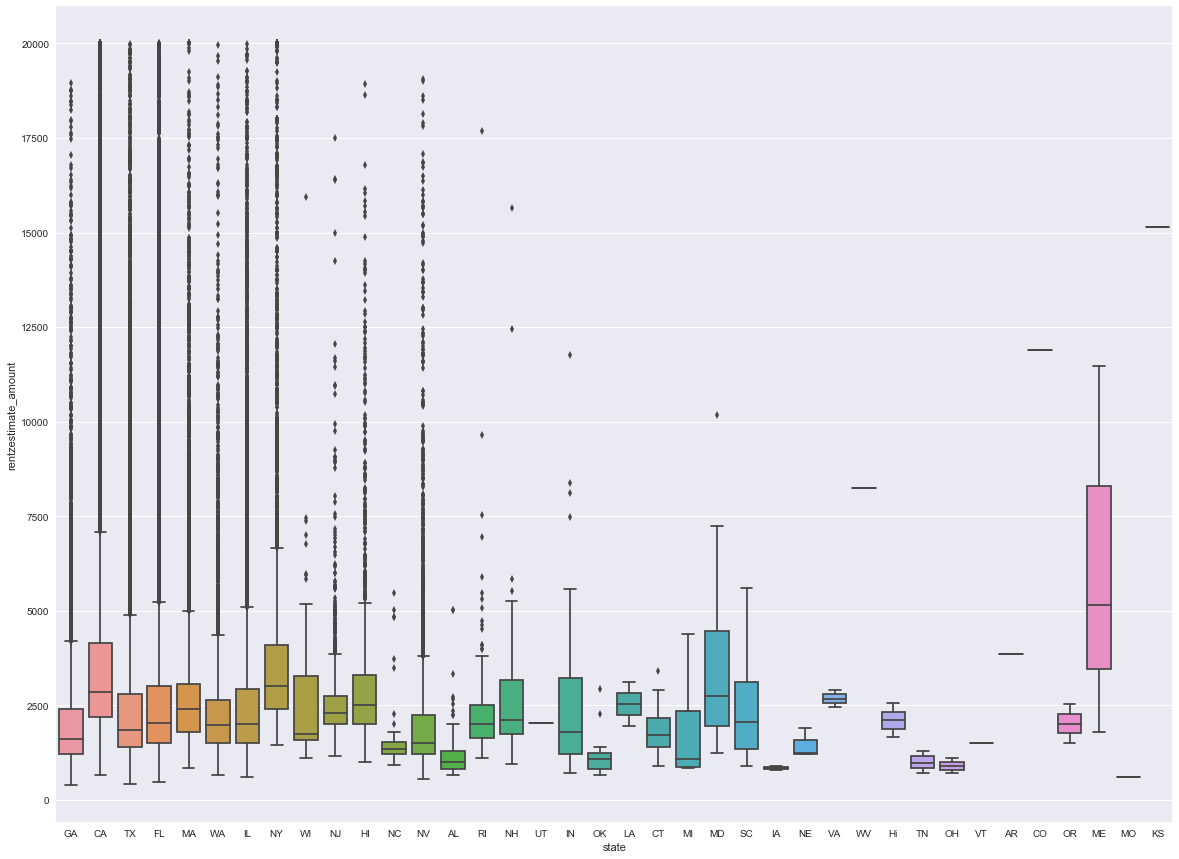

In [33]:
#box plot rent/state
var = 'state'
data = pd.concat([data_train['rentzestimate_amount'].where(data_train['rentzestimate_amount'] <= 20000), data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x=var, y="rentzestimate_amount", data=data)
#fig.axis(ymin=0, ymax=800000);

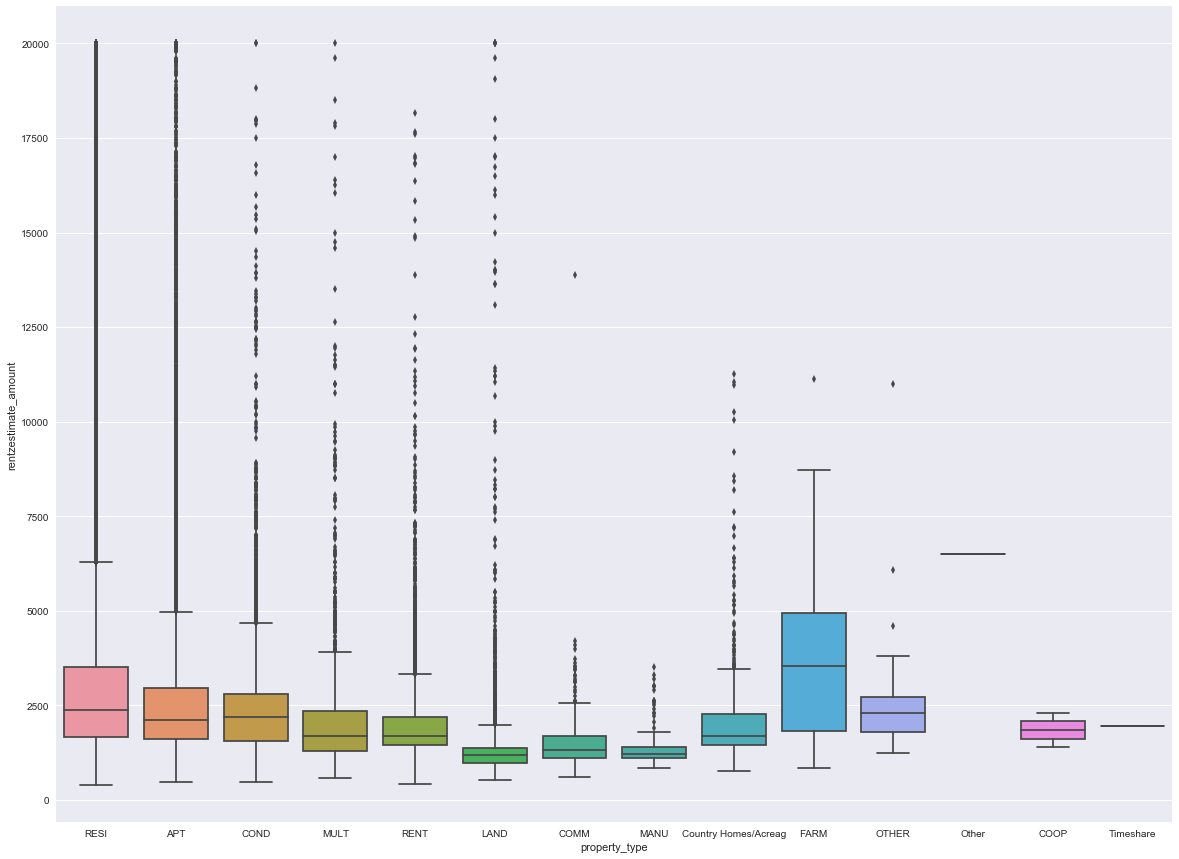

In [34]:
# categorical varibale. box plot property type/rent
var = 'property_type'
data = pd.concat([data_train['rentzestimate_amount'].where(data_train['rentzestimate_amount'] <= 20000), data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x=var, y="rentzestimate_amount", data=data)
#fig.axis(ymin=0, ymax=800000);

KeyboardInterrupt: 

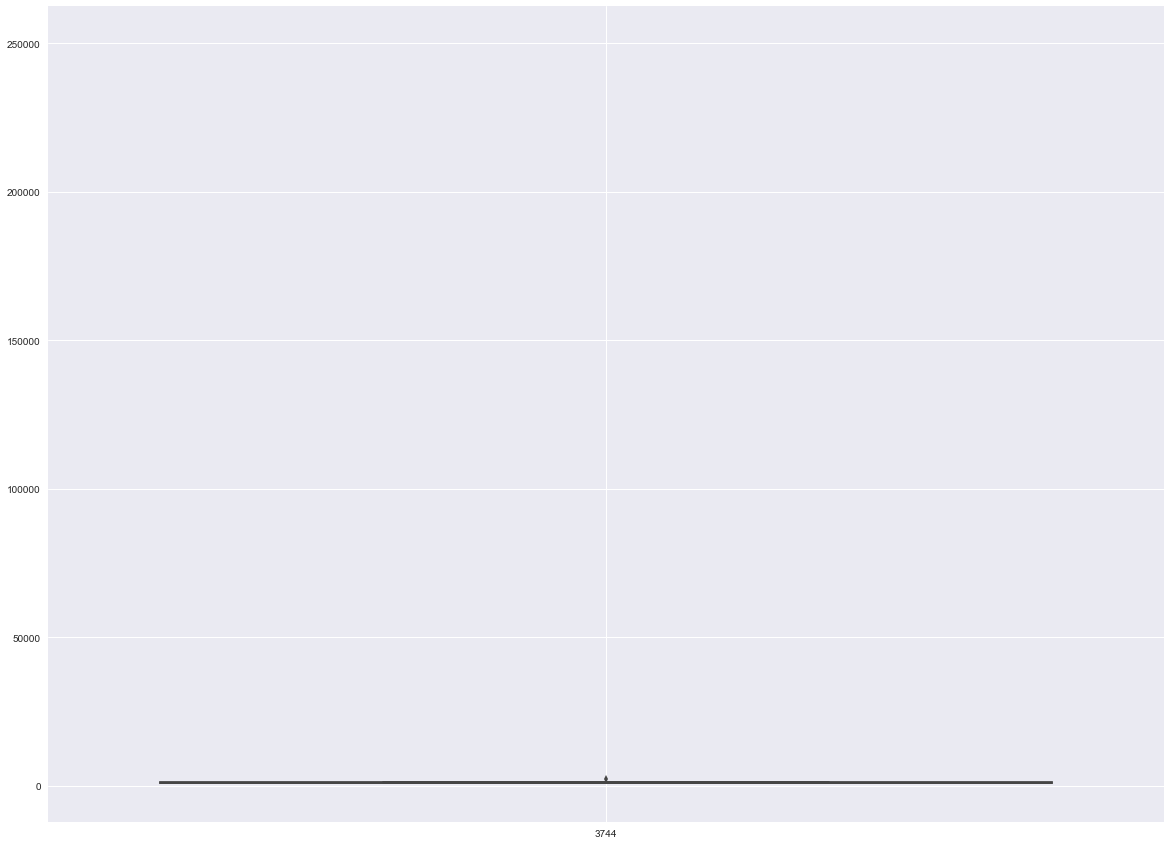

In [40]:
var = 'city'
data = pd.concat([data_train['rentzestimate_amount'], data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x=var, y="rentzestimate_amount", data=data)
#fig.axis(ymin=0, ymax=800000);

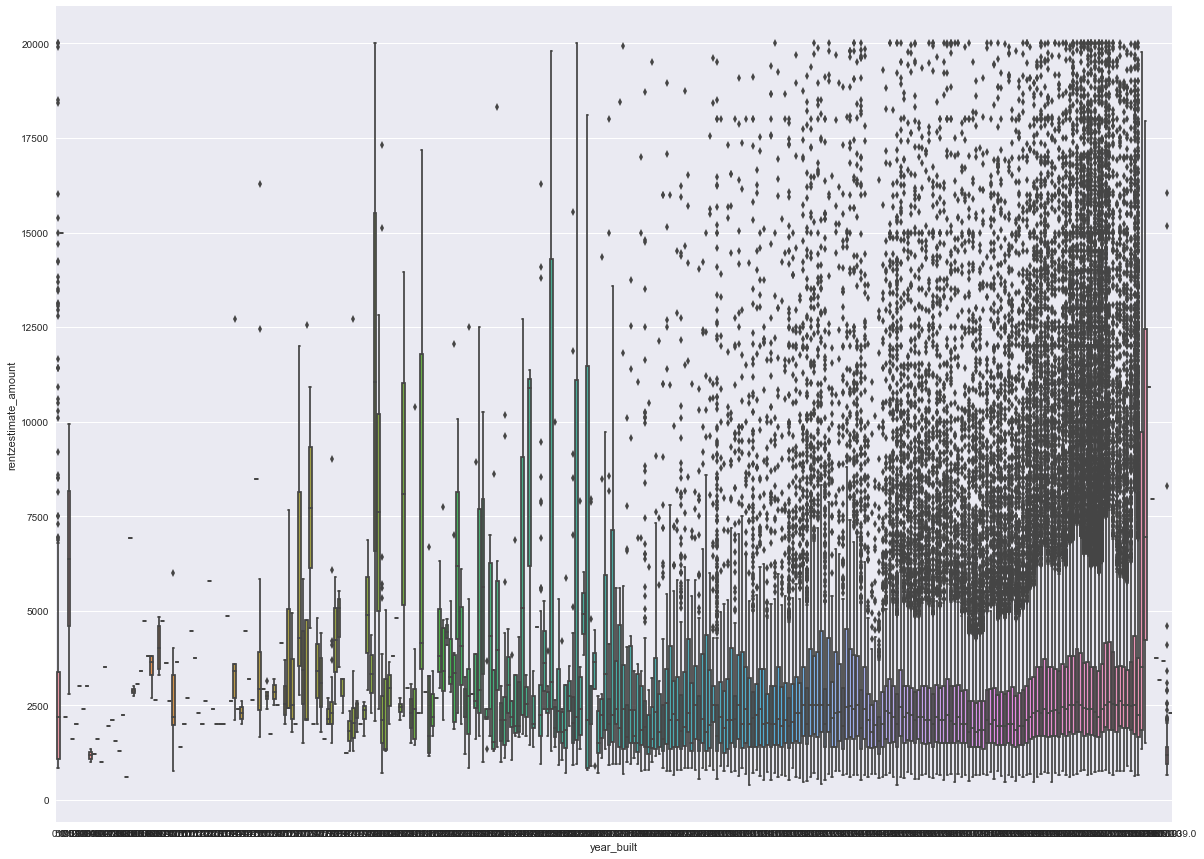

In [95]:
var = 'year_built'
data = pd.concat([data_train['rentzestimate_amount'].where(data_train['rentzestimate_amount'] <= 20000), data_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x=var, y="rentzestimate_amount", data=data)
#fig.axis(ymin=0, ymax=800000);

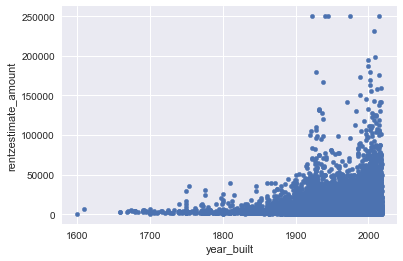

In [59]:
var = 'year_built'
data = pd.concat([data_train['rentzestimate_amount'], data_train[var].where((data_train[var] >= 1600) & (data_train[var] <= 2018))], axis=1)
data.plot.scatter(x=var, y='rentzestimate_amount')

In [63]:
data_train[data_train['year_built'] == 1600]
# year has 9999.0 and <1600 need remove

,bathrooms,bedrooms,city,current_list_price,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount
2568,1.0,2.0,Killeen,60000.0,RESI,870.0,TX,ABOR_22009652,1600.0,76541,599.0


In [53]:
data_train['year_built'].describe()

count    1.868320e+05
mean     2.091947e+03
std      4.527661e+04
min      0.000000e+00
25%      1.966000e+03
50%      1.988000e+03
75%      2.004000e+03
max      1.957194e+07
Name: year_built, dtype: float64

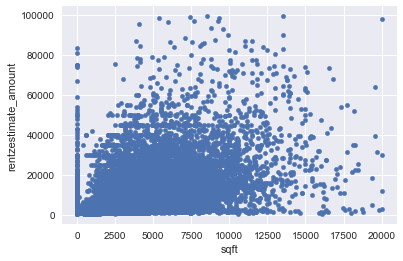

In [57]:
#scatter plot rentestimate/
var = 'sqft'
data = pd.concat([data_train['rentzestimate_amount'].where(data_train['rentzestimate_amount'] <=100000), data_train[var].where(data_train[var] <= 20000)], axis=1)
data.plot.scatter(x=var, y='rentzestimate_amount')
# ylim=(0,300000)

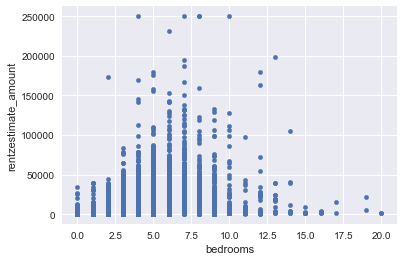

In [92]:
#scatter plot rentestimate/
var = 'bedrooms'
data = pd.concat([data_train['rentzestimate_amount'], data_train[var].where(data_train[var] <=20)], axis=1)
data.plot.scatter(x=var, y='rentzestimate_amount')

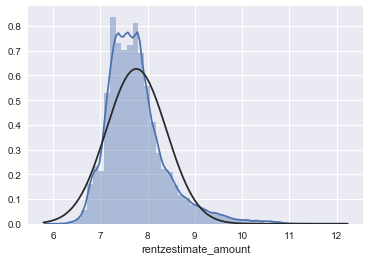

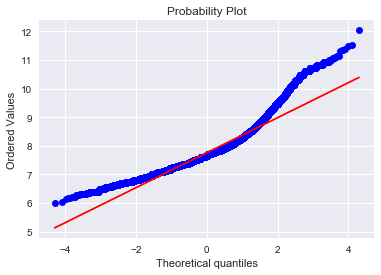

In [180]:
#transformed histogram and normal probability plot
sns.distplot(np.log(using_data['rentzestimate_amount']), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(using_data['rentzestimate_amount']), plot=plt)

In [63]:
#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#data_train[(np.abs(stats.zscore(data_train['sqft']))>1)]

In [ ]:
# dummy variables
df_dummies = pd.get_dummies(df['color_head'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['color_head']

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

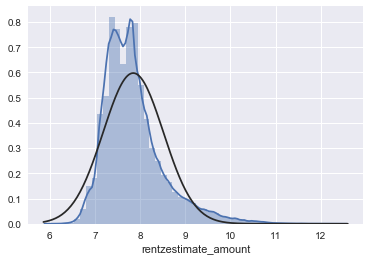

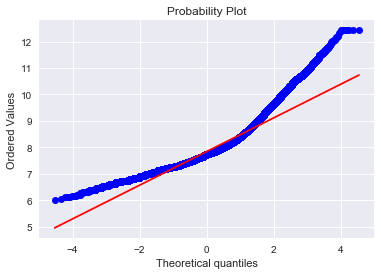

In [46]:
#transformed histogram and normal probability plot
sns.distplot(np.log(using_data['rentzestimate_amount']), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(using_data['rentzestimate_amount']), plot=plt)

In [47]:
# change to category
for col in ['city', 'property_type', 'state', 'year_built', 'zipcode']:
    using_data[col] = using_data[col].astype('category')

In [ ]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

In [ ]:
# select different types of variable print(df.select_dtypes(include=['object']).columns.values)

In [30]:
data_train = data_train.dropna(axis=0, how='any')

In [32]:
data_train.shape

(175485, 11)

In [33]:
data_train = data_train[data_train.rentzestimate_amount < 10000]

In [34]:
data_train = data_train[(data_train['year_built']>=1800) & (data_train['year_built'] <=2018)]

In [35]:
data_train = data_train[(data_train["bathrooms"] <= 8) & (data_train["bedrooms"] <= 8)]

In [36]:
data_train = data_train[(data_train["bathrooms"] != 0) & (data_train["bedrooms"] != 0)]

In [37]:
data_train = data_train[(data_train["sqft"] > 10) & (data_train["sqft"] < 10000)]

In [38]:
data_train = data_train[(data_train["current_list_price"] > 1) & (data_train["current_list_price"] < 3000000) ]

In [39]:
data_train.describe()

,bathrooms,bedrooms,current_list_price,sqft,year_built,rentzestimate_amount
count,158249.000000,158249.000000,1.582490e+05,158249.000000,158249.000000,158249.000000
mean,2.426024,3.289215,4.900941e+05,2246.585501,1982.553634,2676.434151
std,1.011008,1.106596,4.288674e+05,1171.482005,27.504637,1609.365234
min,0.100000,1.000000,3.250000e+02,70.000000,1800.000000,400.000000
25%,2.000000,3.000000,2.249000e+05,1386.000000,1969.000000,1600.000000
50%,2.000000,3.000000,3.699000e+05,1986.000000,1989.000000,2200.000000
75%,3.000000,4.000000,6.190000e+05,2850.000000,2004.000000,3124.000000
max,8.000000,8.000000,2.999999e+06,9999.000000,2018.000000,9999.000000


In [191]:
data_train[data_train.current_list_price <= 100]

,bathrooms,bedrooms,city,current_list_price,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount,log_rent,log_bedrooms


In [40]:
total = data_train.isnull().sum().sort_values(ascending=False)
percent = (data_train.isnull().sum()/data_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
rentzestimate_amount,0,0.0
zip,0,0.0
year_built,0,0.0
unique_id,0,0.0
state,0,0.0
sqft,0,0.0
property_type,0,0.0
current_list_price,0,0.0
city,0,0.0
bedrooms,0,0.0


In [41]:
data_train.shape

(158249, 11)

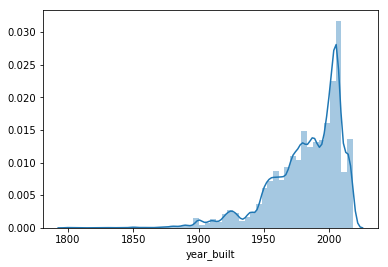

In [42]:
sns.distplot(data_train['year_built'])

In [30]:
data_train['log_rent']  = np.log(data_train['rentzestimate_amount'])

In [189]:
data_train['log_bedrooms']  = np.log(data_train['bedrooms'])

In [193]:
data_train['log_bathrooms']  = np.log(data_train['bathrooms'])

In [31]:
data_train['log_price']  = np.log(data_train['current_list_price'])

In [32]:
data_train['log_sqft']  = np.log(data_train['sqft'])

In [58]:
data_train.head()

,bathrooms,bedrooms,city,current_list_price,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount,scaled_rent,scaled_bedrooms,scaled_bathrooms,scaled_price,scaled_sqft,scaled_year
106917,2.0,3.0,Pembroke,124900.0,RESI,1498.0,GA,GAMLS_8165173,2007.0,31321,1295.0,0.093239,0.285714,0.240506,0.041530,0.143821,0.949541
282857,2.0,3.0,Star Harbor,335000.0,RESI,1422.0,TX,NTREIS_69390726,1979.0,75148,2149.0,0.182206,0.285714,0.240506,0.111570,0.136167,0.821101
80292,2.0,3.0,Bradley,479000.0,RESI,2318.0,CA,CRMLS_123908407,2004.0,93426,2400.0,0.208355,0.285714,0.240506,0.159576,0.226407,0.935780
351797,3.0,3.0,Doral,499000.0,RESI,2121.0,FL,SEFRETS_342345855,2000.0,33178,2949.0,0.265548,0.285714,0.367089,0.166243,0.206567,0.917431
249974,2.0,2.0,Framingham,288000.0,APT,1295.0,MA,MLSPIN_72156014,1966.0,01702,2000.0,0.166684,0.142857,0.240506,0.095902,0.123376,0.761468


In [48]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data_train['rentzestimate_amount']))
data_train['scaled_rent']  = scaler.transform(data_train['rentzestimate_amount'])

MinMaxScaler(copy=True, feature_range=(0, 1))


In [50]:
scaler.fit(data_train['bedrooms'])
data_train['scaled_bedrooms']  = scaler.transform(data_train['bedrooms'])

In [52]:
scaler.fit(data_train['bathrooms'])
data_train['scaled_bathrooms']  = scaler.transform(data_train['bathrooms'])

In [54]:
scaler.fit(data_train['current_list_price'])
data_train['scaled_price']  = scaler.transform(data_train['current_list_price'])

In [55]:
scaler.fit(data_train['sqft'])
data_train['scaled_sqft']  = scaler.transform(data_train['sqft'])

In [57]:
scaler.fit(data_train['year_built'])
data_train['scaled_year']  = scaler.transform(data_train['year_built'])

In [ ]:
# data test

In [68]:
data_test.head()

,bathrooms,bedrooms,city,current_list_price,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount,log_rent,log_price,log_sqft,scaled_rent,scaled_bedrooms,scaled_bathrooms,scaled_price,scaled_sqft,scaled_year
8,3.0,3.0,Liberty Hill,619000.0,RESI,3355.0,TX,ABOR_17982224,2014.0,78642,3010.0,8.009695,13.335861,8.118207,0.270030,0.285714,0.374218,0.206229,0.334802,0.981651
9,2.0,2.0,Austin,735000.0,APT,1416.0,TX,ABOR_18247858,2004.0,78701,3569.0,8.180041,13.507626,7.255591,0.328424,0.142857,0.249061,0.244901,0.140669,0.935780
12,6.0,5.0,Austin,684990.0,RESI,4292.0,TX,ABOR_18452154,2016.0,78738,3624.0,8.195334,13.437160,8.364508,0.334169,0.571429,0.749687,0.228228,0.428614,0.990826
15,3.0,3.0,Cameron,975000.0,RESI,2975.0,TX,ABOR_18658238,1990.0,76520,4699.0,8.455105,13.790193,7.997999,0.446464,0.285714,0.374218,0.324911,0.296756,0.871560
16,4.0,5.0,Hutto,265504.0,RESI,2495.0,TX,ABOR_18677940,2015.0,78634,1795.0,7.492760,12.489385,7.822044,0.143111,0.571429,0.499374,0.088381,0.248698,0.986239


In [59]:
data_test = data_test.dropna(axis=0, how='any')
data_test = data_test[data_test.rentzestimate_amount < 10000]
data_test = data_test[(data_test['year_built']>=1800) & (data_test['year_built'] <=2018)]
data_test = data_test[(data_test["bathrooms"] <= 8) & (data_test["bedrooms"] <= 8)]
data_test = data_test[(data_test["bathrooms"] != 0) & (data_test["bedrooms"] != 0)]
data_test = data_test[(data_test["sqft"] > 10) & (data_test["sqft"] < 10000)]
data_test = data_test[(data_test["current_list_price"] > 1) & (data_test["current_list_price"] < 3000000) ]

In [60]:
data_test['log_rent']  = np.log(data_test['rentzestimate_amount'])
data_test['log_price']  = np.log(data_test['current_list_price'])
data_test['log_sqft']  = np.log(data_test['sqft'])

In [61]:
scaler = MinMaxScaler()
scaler.fit(data_test['rentzestimate_amount'])
data_test['scaled_rent']  = scaler.transform(data_test['rentzestimate_amount'])

In [62]:
scaler.fit(data_test['bedrooms'])
data_test['scaled_bedrooms']  = scaler.transform(data_test['bedrooms'])

In [63]:
scaler.fit(data_test['bathrooms'])
data_test['scaled_bathrooms']  = scaler.transform(data_test['bathrooms'])

In [64]:
scaler.fit(data_test['current_list_price'])
data_test['scaled_price']  = scaler.transform(data_test['current_list_price'])

In [65]:
scaler.fit(data_test['sqft'])
data_test['scaled_sqft']  = scaler.transform(data_test['sqft'])

In [66]:
scaler.fit(data_test['year_built'])
data_test['scaled_year']  = scaler.transform(data_test['year_built'])

In [67]:
data_test.shape

(67732, 20)

In [84]:
data_test.head()

,bathrooms,bedrooms,city,current_list_price,property_type,sqft,state,unique_id,year_built,zip,rentzestimate_amount,log_rent,log_price,log_sqft
8,3.0,3.0,Liberty Hill,619000.0,RESI,3355.0,TX,ABOR_17982224,2014.0,78642,3010.0,8.009695,13.335861,8.118207
9,2.0,2.0,Austin,735000.0,APT,1416.0,TX,ABOR_18247858,2004.0,78701,3569.0,8.180041,13.507626,7.255591
12,6.0,5.0,Austin,684990.0,RESI,4292.0,TX,ABOR_18452154,2016.0,78738,3624.0,8.195334,13.437160,8.364508
15,3.0,3.0,Cameron,975000.0,RESI,2975.0,TX,ABOR_18658238,1990.0,76520,4699.0,8.455105,13.790193,7.997999
16,4.0,5.0,Hutto,265504.0,RESI,2495.0,TX,ABOR_18677940,2015.0,78634,1795.0,7.492760,12.489385,7.822044


In [ ]:
# data null

In [185]:
data_null.head()

,bathrooms,bedrooms,city,current_list_price,location_latitude,location_longitude,lot_sqft,property_type,sqft,state,unique_id,year_built,zip
7,3.0,3.0,San Marcos,334900.0,29.866884,-97.968936,0.0,COND,2351.0,TX,ABOR_17615028,2016.0,78666
25,3.0,3.0,Giddings,950000.0,30.110725,-96.896752,67.0,RESI,2505.0,TX,ABOR_18942831,1990.0,78942
32,5.0,5.0,Spicewood,899900.0,30.480103,-98.124169,1.0,RESI,4266.0,TX,ABOR_19027435,2007.0,78669
39,4.0,4.0,Austin,639000.0,30.189674,-97.986250,0.0,RESI,3520.0,TX,ABOR_19139070,2016.0,78737
40,6.0,5.0,Austin,1285000.0,30.327920,-98.010209,1.0,RESI,4552.0,TX,ABOR_19149094,2016.0,78738


In [184]:
data_null = data_null.drop('rentzestimate_amount', axis=1)
data_null = data_null.dropna(axis=0, how='any')
data_null = data_null[(data_null['year_built']>=1800) & (data_null['year_built'] <=2018)]
data_null = data_null[(data_null["bathrooms"] <= 8) & (data_null["bedrooms"] <= 8)]
data_null = data_null[(data_null["bathrooms"] != 0) & (data_null["bedrooms"] != 0)]
data_null = data_null[(data_null["sqft"] > 10) & (data_null["sqft"] < 10000)]
data_null = data_null[(data_null["current_list_price"] > 1) & (data_null["current_list_price"] < 3000000) ]

In [135]:
data_null['log_price']  = np.log(data_null['current_list_price'])
data_null['log_sqft']  = np.log(data_null['sqft'])

In [186]:
scaler = MinMaxScaler()
scaler.fit(data_null['bedrooms'])
data_null['scaled_bedrooms']  = scaler.transform(data_null['bedrooms'])

In [187]:
scaler.fit(data_null['bathrooms'])
data_null['scaled_bathrooms']  = scaler.transform(data_null['bathrooms'])

In [188]:
scaler.fit(data_null['current_list_price'])
data_null['scaled_price']  = scaler.transform(data_null['current_list_price'])

In [189]:
scaler.fit(data_null['sqft'])
data_null['scaled_sqft']  = scaler.transform(data_null['sqft'])

In [190]:
scaler.fit(data_null['year_built'])
data_null['scaled_year']  = scaler.transform(data_null['year_built'])

In [191]:
data_null.shape

(39101, 18)

In [221]:
data_null["scaled_rent"] = np.nan

In [222]:
data_null.head()

,bathrooms,bedrooms,city,current_list_price,location_latitude,location_longitude,lot_sqft,property_type,sqft,state,unique_id,year_built,zip,scaled_bedrooms,scaled_bathrooms,scaled_price,scaled_sqft,scaled_year,rentzestimate_amount,scaled.rent,scaled_rent
7,3.0,3.0,San Marcos,334900.0,29.866884,-97.968936,0.0,COND,2351.0,TX,ABOR_17615028,2016.0,78666,0.285714,0.367089,0.111519,0.233744,0.990826,NaN,NaN,NaN
25,3.0,3.0,Giddings,950000.0,30.110725,-96.896752,67.0,RESI,2505.0,TX,ABOR_18942831,1990.0,78942,0.285714,0.367089,0.316587,0.249173,0.871560,NaN,NaN,NaN
32,5.0,5.0,Spicewood,899900.0,30.480103,-98.124169,1.0,RESI,4266.0,TX,ABOR_19027435,2007.0,78669,0.571429,0.620253,0.299885,0.425609,0.949541,NaN,NaN,NaN
39,4.0,4.0,Austin,639000.0,30.189674,-97.986250,0.0,RESI,3520.0,TX,ABOR_19139070,2016.0,78737,0.428571,0.493671,0.212903,0.350867,0.990826,NaN,NaN,NaN
40,6.0,5.0,Austin,1285000.0,30.327920,-98.010209,1.0,RESI,4552.0,TX,ABOR_19149094,2016.0,78738,0.571429,0.746835,0.428273,0.454263,0.990826,NaN,NaN,NaN


In [205]:
data_train.columns

Index(['bathrooms', 'bedrooms', 'city', 'current_list_price', 'property_type',
       'sqft', 'state', 'unique_id', 'year_built', 'zip',
       'rentzestimate_amount', 'scaled_rent', 'scaled_bedrooms',
       'scaled_bathrooms', 'scaled_price', 'scaled_sqft', 'scaled_year'],
      dtype='object')

In [280]:
#LABEL_COLUMN = "scaled_rent"
LABEL_COLUMN = "rentzestimate_amount"
CATEGORICAL_COLUMNS = ["city", "property_type", 'state', 'zip']
CONTINUOUS_COLUMNS = ['scaled_bathrooms', 'scaled_bedrooms', 'scaled_price', 'scaled_sqft', 'scaled_year']
FEATURES = ["city", "property_type", 'state', 'zip', 'scaled_bathrooms', 'scaled_bedrooms', 'scaled_price', 'scaled_sqft', 'scaled_year']

In [35]:
import tensorflow as tf

def input_fn(df):
  # Creates a dictionary mapping from each continuous feature column name (k) to
  # the values of that column stored in a constant Tensor.
  continuous_cols = {k: tf.constant(df[k].values)
                     for k in CONTINUOUS_COLUMNS}
  # Creates a dictionary mapping from each categorical feature column name (k)
  # to the values of that column stored in a tf.SparseTensor.
  categorical_cols = {k: tf.SparseTensor(
      indices=[[i, 0] for i in range(df[k].size)],
      values=df[k].values,
      dense_shape=[df[k].size, 1])
                      for k in CATEGORICAL_COLUMNS}
  # Merges the two dictionaries into one.
  feature_cols = dict(continuous_cols.items() | categorical_cols.items())
  # Converts the label column into a constant Tensor.
  label = tf.constant(df[LABEL_COLUMN].values)
  # Returns the feature columns and the label.
  return feature_cols, label

def train_input_fn():
  return input_fn(data_train)

def eval_input_fn():
  return input_fn(data_test)

def predict_input_fn():
  return input_fn(data_null)


In [148]:
city = tf.contrib.layers.sparse_column_with_hash_bucket("city", hash_bucket_size=5000)

In [149]:
state = tf.contrib.layers.sparse_column_with_hash_bucket("state", hash_bucket_size=100)

In [150]:
zip = tf.contrib.layers.sparse_column_with_hash_bucket("zip", hash_bucket_size=10000)

In [151]:
property_type = tf.contrib.layers.sparse_column_with_hash_bucket("property_type", hash_bucket_size=100)

In [152]:
bathrooms = tf.contrib.layers.real_valued_column("scaled_bathrooms")

In [153]:
bedrooms = tf.contrib.layers.real_valued_column("scaled_bedrooms")

In [154]:
current_list_price = tf.contrib.layers.real_valued_column("scaled_price")

In [155]:
sqft = tf.contrib.layers.real_valued_column("scaled_sqft")

In [156]:
year_built = tf.contrib.layers.real_valued_column("scaled_year")

In [50]:
year_buckets = tf.contrib.layers.bucketized_column(year_built, boundaries=[1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018])

In [290]:
wide_columns = [city, state, zip, property_type, bathrooms, bedrooms, current_list_price, sqft, year_built]
m = tf.contrib.learn.LinearRegressor(
    feature_columns= wide_columns,
    optimizer=tf.train.FtrlOptimizer(learning_rate=1, l2_regularization_strength=0.01, l1_regularization_strength=0.01))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019D4E7D4EB8>, '_save_checkpoints_secs': 600, '_num_worker_replicas': 0, '_session_config': None, '_environment': 'local', '_evaluation_master': '', '_save_summary_steps': 100, '_tf_random_seed': None, '_task_id': 0, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmpg0icz3oj', '_save_checkpoints_steps': None}


In [291]:
m.fit(input_fn=train_input_fn, steps=5000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Lenovo\AppData\Local\Temp\tmpg0icz3oj\model.ckpt.
INFO:tensorflow:loss = 9.7534e+06, step = 1
INFO:tensorflow:global_step/sec: 26.4732
INFO:tensorflow:loss = 9.07686e+06, step = 101 (3.778 sec)
INFO:tensorflow:global_step/sec: 28.3279
INFO:tensorflow:loss = 8.78888e+06, step = 201 (3.529 sec)
INFO:tensorflow:global_step/sec: 26.9627
INFO:tensorflow:loss = 8.57338e+06, step = 301 (3.711 sec)
INFO:tensorflow:global_step/sec: 24.4995
INFO:tensorflow:loss = 8.39535e+06, step = 401 (4.081 sec)
INFO:tensorflow:global_step/sec: 22.6477
INFO:tensorflow:loss = 8.24129e+06, s

LinearRegressor(params={'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x0000019D4E7D49B0>, 'gradient_clip_norm': None, 'feature_columns': [_SparseColumnHashed(column_name='city', is_integerized=False, bucket_size=5000, lookup_config=None, combiner='sum', dtype=tf.string), _SparseColumnHashed(column_name='state', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string), _SparseColumnHashed(column_name='zip', is_integerized=False, bucket_size=10000, lookup_config=None, combiner='sum', dtype=tf.string), _SparseColumnHashed(column_name='property_type', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string), _RealValuedColumn(column_name='scaled_bathrooms', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='scaled_bedrooms', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='scaled_price', dimension=

In [292]:
m.evaluate(input_fn=eval_input_fn, steps=1)
#for key in sorted(results):
   # print ("%s: %s" % (key, results[key]))

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-08-31-15:24:57
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpg0icz3oj\model.ckpt-5000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-08-31-15:24:59
INFO:tensorflow:Saving dict for global step 5000: global_step = 5000, loss = 5.64377e+06


{'global_step': 5000, 'loss': 5643766.0}

In [294]:
predictions = list(m.predict(input_fn=eval_input_fn))

Instructions for updating:
Please switch to predict_scores, or set `outputs` argument.
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpg0icz3oj\model.ckpt-5000


In [307]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions, data_test['rentzestimate_amount'])

5643772.782393218

In [308]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions, data_test['rentzestimate_amount'])

1782.7547421298532

In [69]:
# Deep model 

In [311]:
deep_columns = [
    tf.contrib.layers.embedding_column(city, dimension = 8),
    tf.contrib.layers.embedding_column(state, dimension = 8),
    tf.contrib.layers.embedding_column(zip, dimension = 8),
    tf.contrib.layers.embedding_column(property_type, dimension = 8),
    bathrooms, bedrooms, current_list_price, sqft, year_built]
deep_model = tf.contrib.learn.DNNRegressor(
    feature_columns=deep_columns,
    hidden_units = [5, 4],
    optimizer=tf.train.ProximalAdagradOptimizer(
      learning_rate=1.0,
      l1_regularization_strength=0.001,
      l2_regularization_strength=0.001        
    ))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019D5CCAD0F0>, '_save_checkpoints_secs': 600, '_num_worker_replicas': 0, '_session_config': None, '_environment': 'local', '_evaluation_master': '', '_save_summary_steps': 100, '_tf_random_seed': None, '_task_id': 0, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmp1glt8kpv', '_save_checkpoints_steps': None}


In [320]:
deep_model.fit(input_fn=train_input_fn, steps=1000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmp1glt8kpv\model.ckpt-2000
INFO:tensorflow:Saving checkpoints for 2001 into C:\Users\Lenovo\AppData\Local\Temp\tmp1glt8kpv\model.ckpt.
INFO:tensorflow:loss = 262479.0, step = 2001
INFO:tensorflow:global_step/sec: 4.60323
INFO:tensorflow:loss = 261411.0, step = 2101 (21.728 sec)
INFO:tensorflow:global_step/sec: 4.36055
INFO:tensorflow:loss = 260450.0, step = 2201 (22.929 sec)
INFO:tensorflow:global_step/sec: 4.4847
INFO:tensorflow:loss = 259696.0, step = 2301 (22.298 sec)
INFO:tensorflow:global_step/sec: 4.45026
INFO:tensorflow:loss = 259014.0,

DNNRegressor(params={'optimizer': <tensorflow.python.training.proximal_adagrad.ProximalAdagradOptimizer object at 0x0000019D5CCACC88>, 'dropout': None, 'hidden_units': [5, 4], 'input_layer_min_slice_size': None, 'gradient_clip_norm': None, 'activation_fn': <function relu at 0x0000019C8C8D1EA0>, 'embedding_lr_multipliers': None, 'feature_columns': (_EmbeddingColumn(sparse_id_column=_SparseColumnHashed(column_name='city', is_integerized=False, bucket_size=5000, lookup_config=None, combiner='sum', dtype=tf.string), dimension=8, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x0000019D5CC8CE48>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, shared_embedding_name=None, shared_vocab_size=None, max_norm=None, trainable=True), _EmbeddingColumn(sparse_id_column=_SparseColumnHashed(column_name='state', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string), dimension=8, combiner='mean', initializer=<tensorflow.pytho

In [321]:
deep_model.evaluate(input_fn=eval_input_fn, steps=1)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-09-01-00:08:06
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmp1glt8kpv\model.ckpt-3000
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-09-01-00:08:07
INFO:tensorflow:Saving dict for global step 3000: global_step = 3000, loss = 367726.0


{'global_step': 3000, 'loss': 367725.84}

In [322]:
deep_predictions = list(deep_model.predict_scores(input_fn = eval_input_fn))

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmp1glt8kpv\model.ckpt-3000


In [273]:
print (predictions[1:5])

[2694.1384, 4656.7822, 3301.009, 5913.4365]


In [323]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(deep_predictions, data_test['rentzestimate_amount'])

306.23523648104947

In [275]:
print (max(predictions))

13821.6


In [112]:
#wide and deep model 

In [324]:
wide_and_deep_model = tf.contrib.learn.DNNLinearCombinedRegressor(
        linear_feature_columns=wide_columns,
        dnn_feature_columns=deep_columns,
        dnn_hidden_units=[5, 4],
       dnn_optimizer=tf.train.ProximalAdagradOptimizer(
      learning_rate=1.0,
      l1_regularization_strength=0.001,
      l2_regularization_strength=0.001 ))

Instructions for updating:
Please set fix_global_step_increment_bug=True and update training steps in your pipeline. See pydoc for details.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_task_type': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019D82BD24A8>, '_save_checkpoints_secs': 600, '_num_worker_replicas': 0, '_session_config': None, '_environment': 'local', '_evaluation_master': '', '_save_summary_steps': 100, '_tf_random_seed': None, '_task_id': 0, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Lenovo\\AppData\\Local\\Temp\\tmp8_jdpwql', '_save_checkpoints_steps': None}


In [325]:
wide_and_deep_model.fit(input_fn=train_input_fn, steps=1000)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 2 into C:\Users\Lenovo\AppData\Local\Temp\tmp8_jdpwql\model.ckpt.
INFO:tensorflow:loss = 9.7533e+06, step = 2
INFO:tensorflow:global_step/sec: 8.24304
INFO:tensorflow:global_step/sec: 8.10906
INFO:tensorflow:loss = 1.14392e+06, step = 202 (24.465 sec)
INFO:tensorflow:global_step/sec: 7.24902
INFO:tensorflow:global_step/sec: 6.97225
INFO:tensorflow:loss = 601551.0, step = 402 (28.138 sec)
INFO:tensorflow:global_step/sec: 7.23294
INFO:tensorflow:global_step/sec: 7.47198
INFO:tensorflow:loss = 421254.0, step = 602 (27.209 sec)
INFO:tensorflow:global_step/sec: 7.64346
INFO:tensorflow:g

DNNLinearCombinedRegressor(params={'linear_optimizer': None, 'gradient_clip_norm': None, 'dnn_activation_fn': <function relu at 0x0000019C8C8D1EA0>, 'embedding_lr_multipliers': None, 'dnn_dropout': None, 'linear_feature_columns': [_SparseColumnHashed(column_name='city', is_integerized=False, bucket_size=5000, lookup_config=None, combiner='sum', dtype=tf.string), _SparseColumnHashed(column_name='state', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string), _SparseColumnHashed(column_name='zip', is_integerized=False, bucket_size=10000, lookup_config=None, combiner='sum', dtype=tf.string), _SparseColumnHashed(column_name='property_type', is_integerized=False, bucket_size=100, lookup_config=None, combiner='sum', dtype=tf.string), _RealValuedColumn(column_name='scaled_bathrooms', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='scaled_bedrooms', dimension=1, default_value=None, dtype=tf.float32, normal

In [326]:
wide_and_deep_model.evaluate(input_fn=eval_input_fn, steps=1)

Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Starting evaluation at 2017-09-01-00:22:32
INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmp8_jdpwql\model.ckpt-1002
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2017-09-01-00:22:34
INFO:tensorflow:Saving dict for global step 1002: global_step = 1002, loss = 436864.0


{'global_step': 1002, 'loss': 436864.22}

In [204]:
wide_and_deep_model.predict_scores(input_fn=eval_input_fn)

INFO:tensorflow:Restoring parameters from C:\Users\Lenovo\AppData\Local\Temp\tmpnpo35ibc\model.ckpt-5002


<generator object DNNLinearCombinedRegressor.predict_scores.<locals>.<genexpr> at 0x000001CD60CD8BA0>